### Importing librarys 

In [36]:
import nltk
import pandas as pd
import numpy as np
import string as st
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
col_names = ["target", "ids", "date", "flag", "user", "text"]
df=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='iso-8859-1',names=col_names) # for simples such as  @ 
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df=df.drop(['ids','date','flag','user'],axis=1)

In [6]:
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


### Cleaning the Text 

In [7]:
df['target']=df['target'].replace(4,1) #0 : negative / 1:posative

In [8]:
def clean_text(text):
    a = [w.lower() for w in text if (w not in st.punctuation) and (w not in st.digits)]
    return ''.join(a) 

In [9]:
def remove_stopword(text):
    # Load stopwords from nltk
    stopword = set(nltk.corpus.stopwords.words('english')) - {'not'}
    # Remove stopwords from input text 
    a = [w for w in nltk.word_tokenize(text) if w not in stopword]
    # Return string
    return ' '.join(a)

In [10]:
def stem_text(text):
    # Create an instance of nltk.stem.PorterStemmer
    stemmer = nltk.stem.PorterStemmer()
    # Apply stemmer on each word in the given text
    a = [stemmer.stem(w) for w in nltk.word_tokenize(text)]
    # Return string
    return ' '.join(a)

In [11]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [12]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [13]:
df['text']=df['text'].apply(lambda x :remove_URL(x))

In [14]:
df['text']=df['text'].apply(lambda x :stem_text(x))

In [15]:
df['text']=df['text'].apply(lambda x :clean_text(x))

In [16]:
df['text']=df['text'].apply(lambda x :remove_stopword(x))

In [17]:
df['text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [18]:
df['text'].head() 

0    switchfoot awww bummer shoulda got david carr ...
1    upset ca nt updat hi facebook text might cri r...
2    kenichan dive mani time ball manag save rest g...
3                      whole bodi feel itchi like fire
4    nationwideclass not behav mad whi becaus ca nt...
Name: text, dtype: object

### Figure of word based on the Target

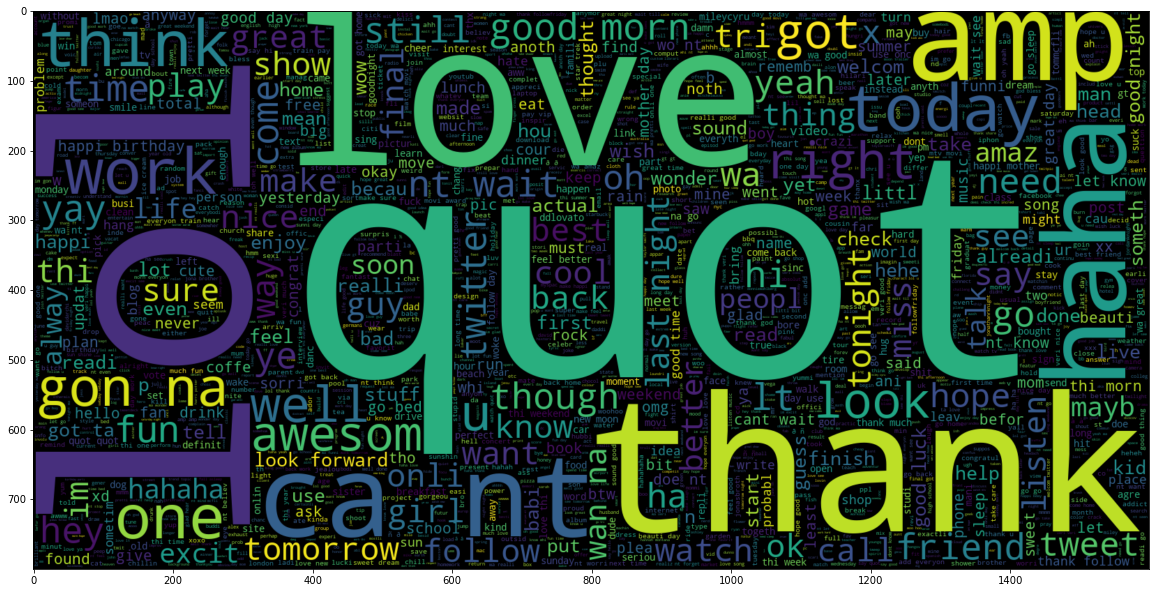

In [37]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

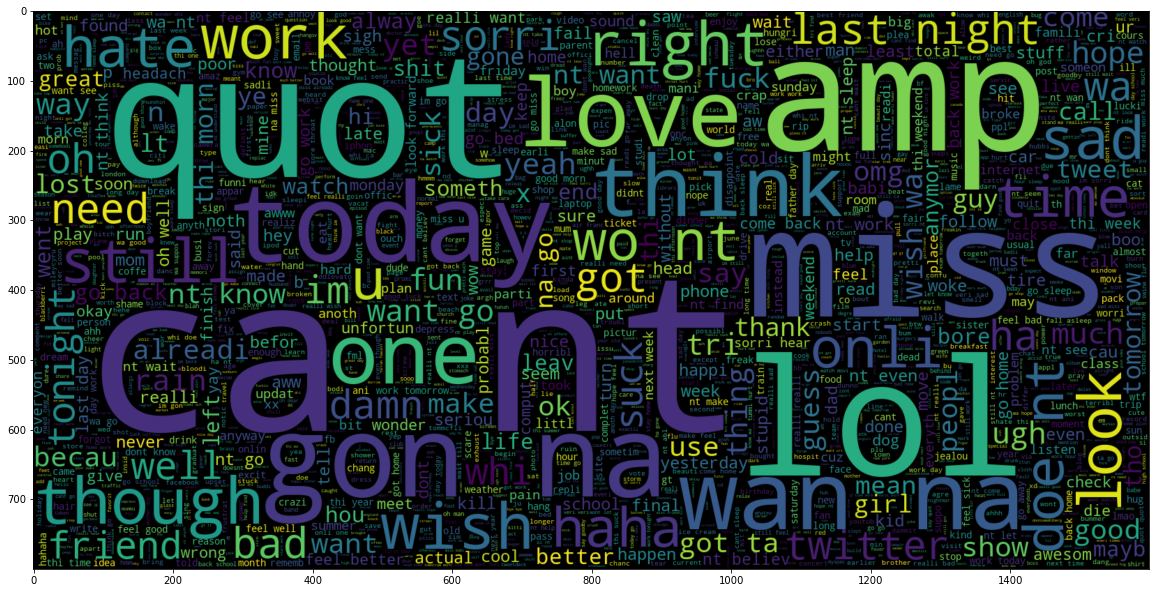

In [38]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

### TF-IDF Vectorizer

In [19]:
td_idf = TfidfVectorizer()
X = td_idf.fit_transform(df['text'])

In [20]:
y=df['target']     

In [ ]:
pickle.dump(td_idf, open('Twittersatmentanalysis.pkl','wb'))

### SPLITING THE DATA

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Model Logistice Regression 

In [22]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
f1_score(y_test,y_pred)

0.793152151697167

In [25]:
pickle.dump(model, open('Twittersatmentanalysis.pkl','wb'))

### Another way of logistic Regression

In [26]:
tfidf_vectorizer = TfidfVectorizer(max_df=.50, min_df=10, max_features=1000, stop_words='english') #0.90 ,2,1000
tfidf = tfidf_vectorizer.fit_transform(df['text'])

In [27]:
tfidf_test=df["target"]

In [28]:
x_train, x_val, y_train, y_val = train_test_split(tfidf,tfidf_test, random_state=0, test_size=0.3)

In [29]:
x_train.shape

(1120000, 1000)

In [30]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
pred = model.predict(x_val)

In [32]:
f1_score(y_val, pred)

0.7588954953139172